# Arithmetic circuit library: Adders

PR [#6164](https://github.com/Qiskit/qiskit-terra/pull/6164)

## Why care about an arithmetic circuit library?

## Adders

In general:
$$
    |a\rangle_n|b\rangle_n|0\rangle \mapsto |a\rangle_n |a + b\rangle_{n+1}
$$

For example, to add 1 and 3 using 2-bit numbers:

$$
    |1\rangle_2 |3\rangle_2 |0\rangle \mapsto |1\rangle_2 |4\rangle_3
$$

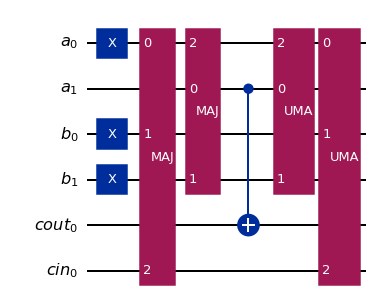

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import RippleCarryAdder

n = 2  # adding 2 bit numbers

a = QuantumCircuit(n)  # encodes |a> = |1>
a.x(0)

b = QuantumCircuit(n)  # encodes |b> = |3>
b.x(0)
b.x(1)

adder = RippleCarryAdder(n)
adder.compose(a, qubits=range(n), front=True, inplace=True)
adder.compose(b, qubits=range(n, 2 * n), front=True, inplace=True)

adder.draw('mpl', style='iqx')

What do we expect?

     0     1    0  0  0  1
    cin0 cout0 b1 b0 a1 a0
     |   \_________/ \___/
     |      = 4       = 1
     |
     scratch qubit

In [2]:
from qiskit.quantum_info import Statevector

sv = Statevector(adder)
print(sv.probabilities_dict())

{'010001': 1.0}


## Supported implementations

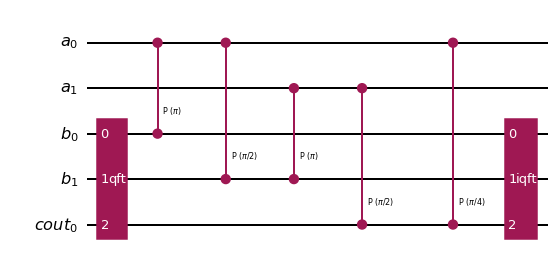

In [3]:
from qiskit.circuit.library import QFTAdder

QFTAdder(n).draw('mpl', style='iqx')

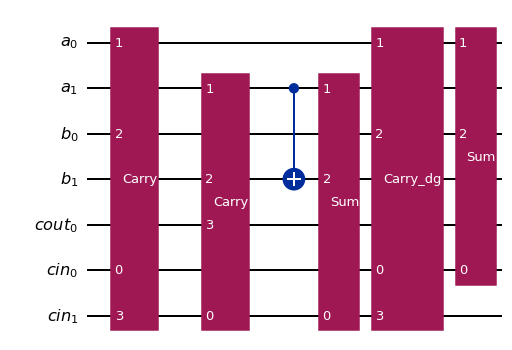

In [4]:
from qiskit.circuit.library import ClassicalAdder

ClassicalAdder(n).draw('mpl', style='iqx')

In [5]:
from qiskit.circuit.library import Adder

for addertype in [ClassicalAdder, RippleCarryAdder, QFTAdder]:
    print(f'{addertype.__name__}: {issubclass(addertype, Adder)}')

ClassicalAdder: True
RippleCarryAdder: True
QFTAdder: True


## Modular adders

$$
    |a\rangle_n|b\rangle_n \mapsto |a\rangle_n |a + b \text{ mod } 2^n\rangle_n
$$

Supported by `QFTAdder(..., modular=True)` and `RippleCarryAdder(..., modular=True)`.

For example, adding 1 and 3 with 2-bit numbers, modulo $2^2$:

$$
    |1\rangle_2 |3\rangle_2 \mapsto |1\rangle_2 |4 \text{ mod } 4\rangle_2 = |1\rangle_2 |0\rangle_2
$$


In [6]:
adder = QFTAdder(n, modular=True)
adder.compose(a, qubits=range(n), front=True, inplace=True)
adder.compose(b, qubits=range(n, 2 * n), front=True, inplace=True)

adder.draw('mpl', style='iqx')

sv = Statevector(adder)
print(sv.probabilities_dict(decimals=10))

{'0001': 1.0}


## Next up

* Multiplier (done)
* Subtractor (almost done)
* Polynomials
* Tutorials

## Question

Should `Adder(n)` be usable with some default implementation?